# 📄 Descrição Geral
O **Mean Shift** é um algoritmo de **clustering** baseado em densidade, que encontra os máximos locais de uma função de densidade de dados. Ele não exige que você defina previamente o número de **clusters**, e é útil para agrupamentos com formas não esféricas e para detectar **outliers**. O algoritmo utiliza **kernels de densidade** e pode ser utilizado em diversas áreas, como análise de dados e processamento de imagens.

---

# 🎯 Objetivo
O objetivo deste script é:

1. **Aplicar o Mean Shift** para segmentar dados em **clusters**.
2. **Visualizar os clusters** gerados e os **centróides** dos mesmos.
3. Demonstrar o funcionamento do algoritmo em **2D** e **3D**.

---

# 🔢 Exemplo 1: Clustering com Mean Shift em Dados 2D 🌱
Neste exemplo, vamos gerar **dados sintéticos** em **2D** e aplicar o **Mean Shift** para identificar os **clusters**. A largura de banda (**bandwidth**) será estimada automaticamente para definir a vizinhança de pontos.

---

# 🧑‍💻 Bloco 1: Gerando Dados Sintéticos

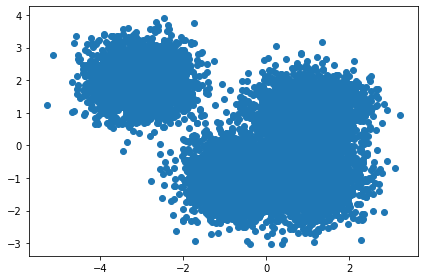

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from itertools import cycle
%matplotlib inline

# Gerando dados sintéticos
centers = [[1, 1], [-.75, -1], [1, -1], [-3, 2]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# Visualizando os dados
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

### 🔍 Objetivo:
- Gerar um conjunto de **dados sintéticos** com 4 centros (**clusters**).
- Visualizar os dados em um **gráfico de dispersão**.

<br>

# 🧑‍💻 Bloco 2: Estimando a Largura de Banda e Criando o Modelo

In [2]:
# Estimando a largura de banda
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=500)

# Criando o modelo Mean Shift
modelo_v1 = MeanShift(bandwidth=bandwidth, bin_seeding=True)

# Treinando o modelo
modelo_v1.fit(X)

MeanShift(bandwidth=0.8244290134395743, bin_seeding=True)

### 🔍 Objetivo:
- Estimar a **largura de banda** necessária para o algoritmo **Mean Shift**.
- Criar e treinar o modelo **Mean Shift** com os dados sintéticos gerados.

<br>

# 🧑‍💻 Bloco 3: Coletando Labels e Centróides dos Clusters

In [3]:
# Coletando os labels, centróides e número de clusters
labels = modelo_v1.labels_
cluster_centers = modelo_v1.cluster_centers_
n_clusters_ = labels.max() + 1

print(f'Número estimado de clusters: {n_clusters_}')

Número estimado de clusters: 5


### 🔍 Objetivo:
- Coletar os **labels** dos **clusters** e os **centróides** dos mesmos.
- Imprimir o número de **clusters** identificados.

<br>

# 🧑‍💻 Bloco 4: Visualizando os Resultados em 2D

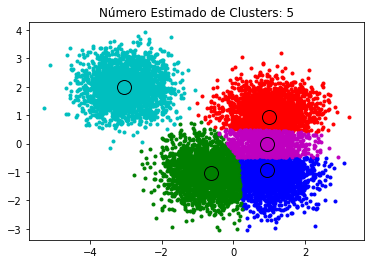

In [4]:
# Plotando os resultados
plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)

plt.title(f'Número Estimado de Clusters: {n_clusters_}')
plt.show()

### 🔍 Objetivo:
- Visualizar os **clusters** em um gráfico **2D**, colorindo os pontos com base no cluster a que pertencem.
- Destacar os **centróides** de cada cluster.

<br><br>

---

<br>

# 🔄 Exemplo 2: Mean Shift em Dados 2D e 3D 🌍
Neste exemplo, vamos aplicar o algoritmo **Mean Shift** tanto em **dados 2D** quanto em **dados 3D**. Visualizaremos os resultados em ambas as dimensões para comparar como o algoritmo se comporta.

<br>

# 🧑‍💻 Bloco 1: Gerando Dados 2D e Visualizando-os

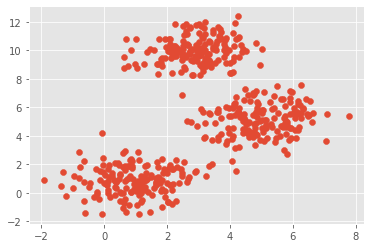

In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
style.use("ggplot")

# Gerando os dados 2D
centers = [[1,1],[5,5],[3,10]]
X, _ = make_blobs(n_samples=500, centers=centers, cluster_std=1)

# Visualizando os dados
plt.scatter(X[:,0], X[:,1])
plt.show()

### 🔍 Objetivo:
- Gerar **dados sintéticos** em **2D** para aplicar o algoritmo **Mean Shift**.
- Visualizar os dados no **gráfico** para observar a distribuição.

<br>

# 🧑‍💻 Bloco 2: Aplicando o Mean Shift e Visualizando os Resultados 2D

[[ 4.97464981  5.16152787]
 [ 2.92088272 10.00760927]
 [ 1.01994674  0.82608277]]

Número Estimado de Clusters: 3


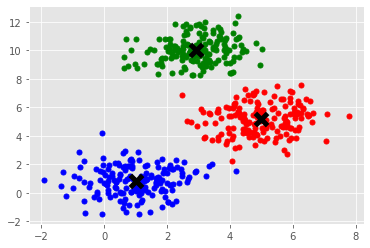

In [7]:
# Criando o modelo Mean Shift para dados 2D
modelo_v2 = MeanShift()

# Treinando o modelo
modelo_v2.fit(X)

# Coletando labels, centróides e número de clusters
labels = modelo_v2.labels_
cluster_centers = modelo_v2.cluster_centers_
n_clusters_ = len(np.unique(labels))

# Print
print(cluster_centers)
print("\nNúmero Estimado de Clusters:", n_clusters_)

# Cores para os clusters
colors = 10*['r.','g.','b.','c.','k.','y.','m.']

# Visualizando os resultados
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker="x", color='k', s=150, linewidths=5, zorder=10)
plt.show()

### 🔍 Objetivo:
- Aplicar o **Mean Shift** aos dados **2D** e visualizar os **clusters**.
- Destacar os **centróides** dos clusters encontrados.

<br>

# 🧑‍💻 Bloco 3: Gerando Dados 3D e Visualizando-os

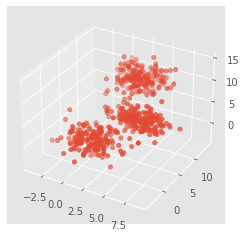

In [8]:
# Gerando dados 3D
centers = [[1,1,1],[5,5,5],[3,10,10]]
X, _ = make_blobs(n_samples=500, centers=centers, cluster_std=1.5)

# Visualizando os dados 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o')
plt.show()

### 🔍 Objetivo:
- Gerar **dados sintéticos** em **3D**.
- Visualizar os pontos de dados em um **gráfico tridimensional**.

<br>

# 🧑‍💻 Bloco 4: Aplicando o Mean Shift e Visualizando os Resultados 3D

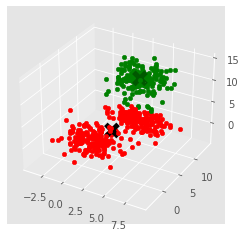

In [9]:
# Aplicando o modelo Mean Shift aos dados 3D
modelo_v3 = MeanShift()
modelo_v3.fit(X)

# Coletando labels, centróides e número de clusters
labels = modelo_v3.labels_
cluster_centers = modelo_v3.cluster_centers_
n_clusters_ = len(np.unique(labels))

# Cores para os clusters
colors = 10*['r','g','b','c','k','y','m']

# Plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotando os dados no gráfico 3D
for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

# Plotando os centróides no gráfico 3D
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2],
           marker="x", color='k', s=150, linewidths=5, zorder=10)
plt.show()

### 🔍 Objetivo:
- Aplicar o **Mean Shift** aos dados **3D** e visualizar os **clusters** encontrados no espaço tridimensional.
- Destacar os **centróides** dos clusters no gráfico.

<br><br>

---

<br>

# 🏁 Conclusão:
O **Mean Shift** é uma técnica eficaz de **clustering** que não depende de suposições sobre a forma dos **clusters** e pode lidar com dados com distribuições **não lineares**. Neste script, vimos como aplicar o **Mean Shift** tanto em dados **2D** quanto **3D**, visualizando os resultados de forma clara e intuitiva. A **estimativa da largura de banda** foi uma parte crucial para o sucesso do algoritmo.

Se precisar de mais informações ou ajustes no código, estarei à disposição!
